# Linear Regression - Daily Data

### We are using Linear Regression to Predict the Daily Minimum and Maximum Temperature

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from datetime import datetime, date, time

#### Now we are going to import our data and convert it required form

In [3]:
#data Import
location = "kolkata"

filename_t2 = "WD_{0}_{1}.csv"
filed = filename_t2.format(location, "D")

def apply_dt(string):
    return datetime.strptime(string, '%Y-%m-%d').date()

df = pd.read_csv(filed)

def apply_tm(string):
    return datetime.strptime(string, '%H:%M:%S').time()

df['date'] = df['date'].apply(apply_dt)

df['sunrise'] = df['sunrise'].apply(apply_tm)
df['sunset'] = df['sunset'].apply(apply_tm)
df['moonrise'] = df['moonrise'].apply(apply_tm)
df['moonset'] = df['moonset'].apply(apply_tm)
df.maxtempC = df.maxtempC.astype('float64')
df.mintempC = df.mintempC.astype('float64')

del(df['Unnamed: 0'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 9 columns):
date                 1871 non-null object
maxtempC             1871 non-null float64
mintempC             1871 non-null float64
sunrise              1871 non-null object
sunset               1871 non-null object
moonrise             1871 non-null object
moonset              1871 non-null object
moon_phase           1871 non-null object
moon_illumination    1871 non-null int64
dtypes: float64(2), int64(1), object(6)
memory usage: 131.6+ KB


#### Now we are going to split our dataset as follows
##### x -> features 
##### y -> target

In [4]:
#y = f(x) ; y,x separator
xreq = ['date']

x = df[xreq]

reqtemp = ['maxtempC','mintempC']
reqsun = ['sunrise','sunset']
reqmoon = ['moonrise','moonset','moon_illumination']

req = reqtemp# + reqsun + reqmoon

y = df[req]
x['date'] = x['date'].apply(date.toordinal)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


### Now we are going to apply the machine learning to train and predict the data

In [5]:
#data split, data model implementation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

weather_model = LinearRegression(fit_intercept=True)

weather_model = weather_model.fit(x_train,y_train)

y_pred = weather_model.predict(x_test)

y_pred = pd.DataFrame(y_pred, columns = req, index = y_test.index)

for i in req:
    print("R^2 score "+i+" : ",metrics.r2_score(y_test[i], y_pred[i]))

R^2 score maxtempC :  0.7229994691128871
R^2 score mintempC :  0.7083657945298663


### Here are the Plots

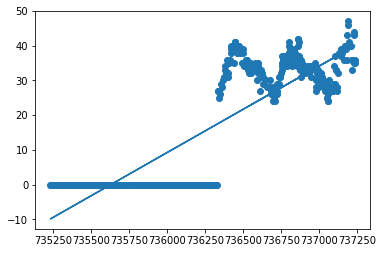

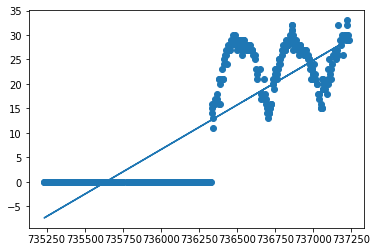

In [6]:
plt.scatter(x_test['date'], y_test['maxtempC'])
plt.plot(x_test['date'], y_pred['maxtempC'])
plt.show()

plt.scatter(x_test['date'], y_test['mintempC'])
plt.plot(x_test['date'], y_pred['mintempC'])
plt.show()